# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1

    # Run an API request for each of the cities
    # Create endpoint URL with each city
    city_url =f"{url}&q={city}"
    try:
        # Parse the JSON and retrieve data
         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | kiruhura
Processing Record 5 of Set 1 | keren
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
import pandas as pd

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          5
Lat           5
Lng           5
Max Temp      5
Humidity      5
Cloudiness    5
Wind Speed    5
Country       5
Date          5
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-18.15,71,100,2.57,CA,1735011257
1,bredasdorp,-34.5322,20.0403,16.13,79,25,2.09,ZA,1735011258
2,ilulissat,69.2167,-51.1000,-14.99,61,100,6.17,GL,1735011259
3,kiruhura,-2.4773,29.7679,14.32,95,100,0.91,RW,1735011260
4,keren,15.7778,38.4581,15.98,63,0,0.86,ER,1735011261


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-18.15,71,100,2.57,CA,1735011257
1,bredasdorp,-34.5322,20.0403,16.13,79,25,2.09,ZA,1735011258
2,ilulissat,69.2167,-51.1000,-14.99,61,100,6.17,GL,1735011259
3,kiruhura,-2.4773,29.7679,14.32,95,100,0.91,RW,1735011260
4,keren,15.7778,38.4581,15.98,63,0,0.86,ER,1735011261


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

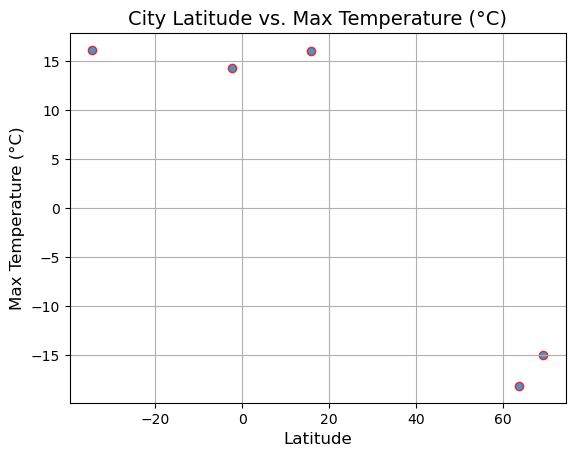

In [8]:
# Build scatter plot for latitude vs. temperature
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="red", alpha=0.8)

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (°C)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

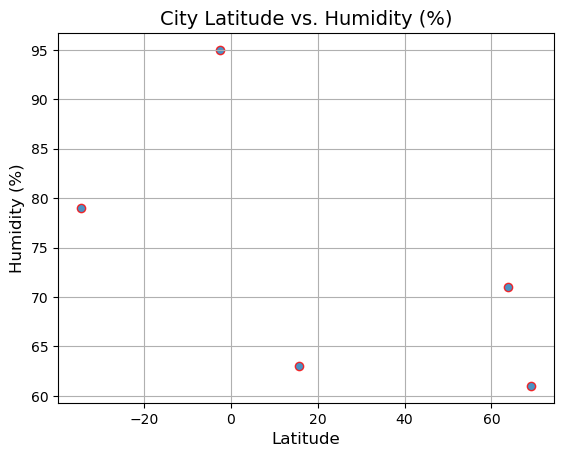

In [9]:
# Build the scatter plots for latitude vs. humidity
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="red", alpha=0.8)

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

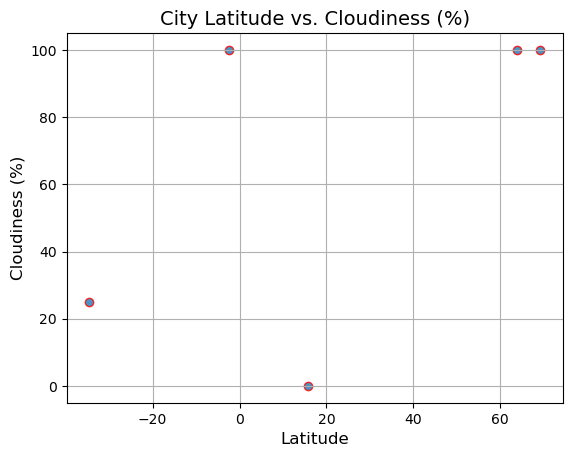

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="red", alpha=0.8)

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

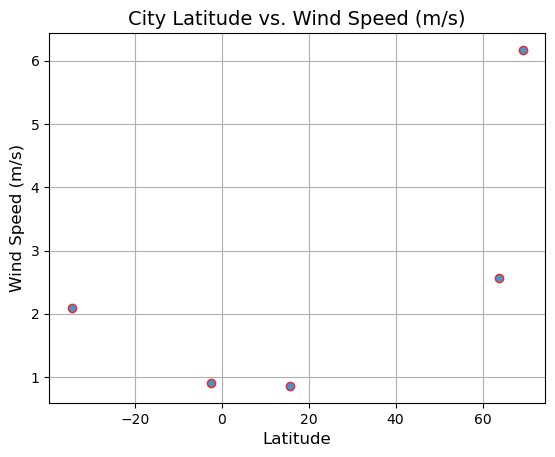

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="red", alpha=0.8)

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, output_file):
    """
    Creates a scatter plot with a linear regression line, displaying the equation and r-value.

    Parameters:
    x_values: array-like
        Independent variable values (e.g., Latitude).
    y_values: array-like
        Dependent variable values (e.g., Temperature).
    title: str
        Title of the plot.
    xlabel: str
        Label for the x-axis.
    ylabel: str
        Label for the y-axis.
    output_file: str
        File path to save the output plot.
    """
    # Perform linear regression
    slope, intercept, r_value, _, _ = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_values, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}\n$r^2$ = {r_value**2:.2f}")
    
    # Incorporate other graph properties
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-18.15,71,100,2.57,CA,1735011257
2,ilulissat,69.2167,-51.1000,-14.99,61,100,6.17,GL,1735011259
4,keren,15.7778,38.4581,15.98,63,0,0.86,ER,1735011261


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,16.13,79,25,2.09,ZA,1735011258
3,kiruhura,-2.4773,29.7679,14.32,95,100,0.91,RW,1735011260


###  Temperature vs. Latitude Linear Regression Plot

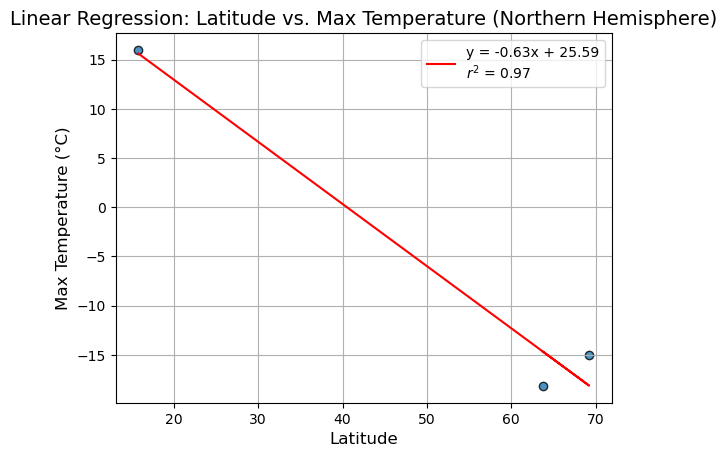

In [15]:
# Linear regression on Northern Hemisphere
# Perform linear regression for Latitude vs. Max Temperature in Northern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    northern_hemi_df["Lat"],               # Independent variable: Latitude
    northern_hemi_df["Max Temp"],           # Dependent variable: Max Temperature
    "Linear Regression: Latitude vs. Max Temperature (Northern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Max Temperature (°C)",                 # y-axis label
    "output_data/Fig_North_Lat_Temp_Linear_Regression.png"    # Output file path
)

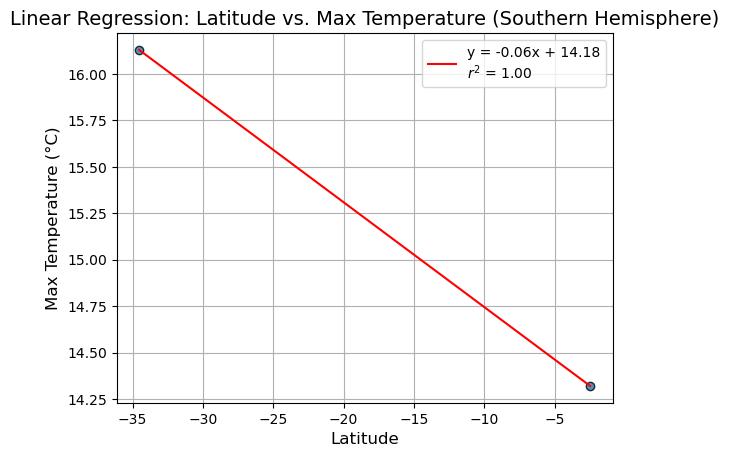

In [16]:
# Linear regression on Southern Hemispher
# Perform linear regression for Latitude vs. Max Temperature in Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],               # Independent variable: Latitude
    southern_hemi_df["Max Temp"],           # Dependent variable: Max Temperature
    "Linear Regression: Latitude vs. Max Temperature (Southern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Max Temperature (°C)",                 # y-axis label
    "output_data/Fig_South_Lat_Temp.png"    # Output file path
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

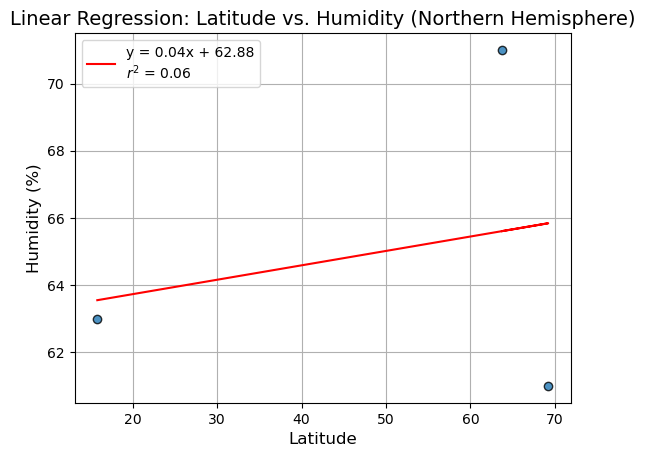

In [17]:
# Northern Hemisphere
# Perform linear regression for Latitude vs. Humidity in Northern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    northern_hemi_df["Lat"],               # Independent variable: Latitude
    northern_hemi_df["Humidity"],          # Dependent variable: Humidity
    "Linear Regression: Latitude vs. Humidity (Northern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Humidity (%)",                         # y-axis label
    "output_data/Fig_North_Lat_Humidity_Linear_Regression.png"    # Output file path
)

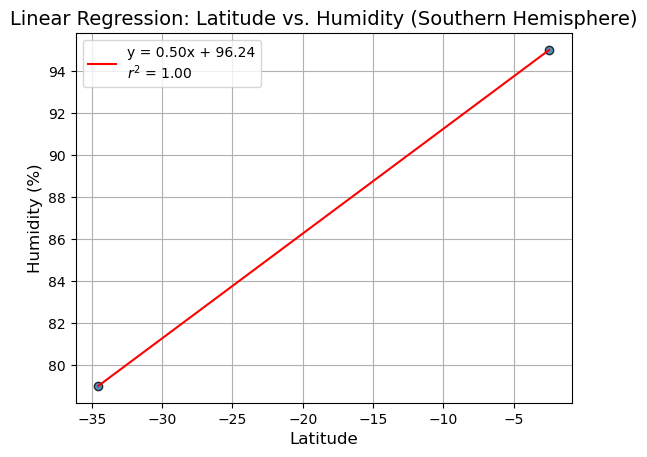

In [18]:
# Southern Hemisphere
# Perform linear regression for Latitude vs. Humidity in Southern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    southern_hemi_df["Lat"],               # Independent variable: Latitude
    southern_hemi_df["Humidity"],          # Dependent variable: Humidity
    "Linear Regression: Latitude vs. Humidity (Southern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Humidity (%)",                         # y-axis label
    "output_data/Fig_South_Lat_Humidity_Linear_Regression.png"    # Output file path
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

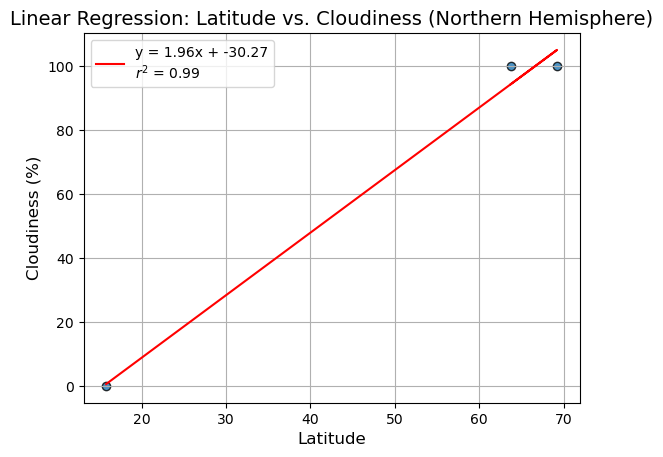

In [19]:
# Northern Hemisphere
# Perform linear regression for Latitude vs. Cloudiness in Northern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    northern_hemi_df["Lat"],               # Independent variable: Latitude
    northern_hemi_df["Cloudiness"],        # Dependent variable: Cloudiness
    "Linear Regression: Latitude vs. Cloudiness (Northern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Cloudiness (%)",                       # y-axis label
    "output_data/Fig_North_Lat_Cloudiness_Linear_Regression.png"  # Output file path
)

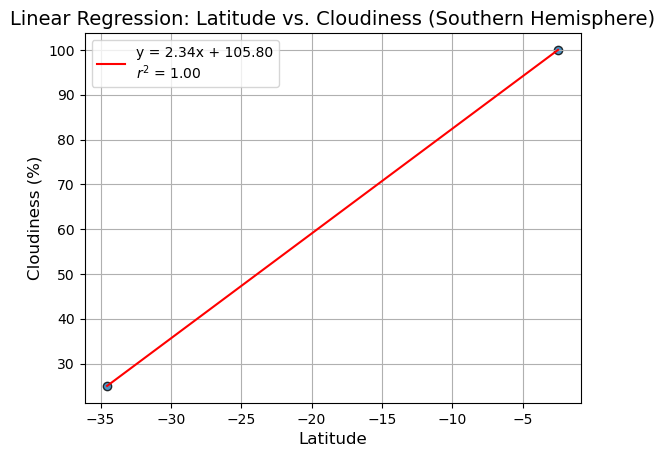

In [20]:
# Southern Hemisphere
# Perform linear regression for Latitude vs. Cloudiness in Southern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    southern_hemi_df["Lat"],               # Independent variable: Latitude
    southern_hemi_df["Cloudiness"],        # Dependent variable: Cloudiness
    "Linear Regression: Latitude vs. Cloudiness (Southern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Cloudiness (%)",                       # y-axis label
    "output_data/Fig_South_Lat_Cloudiness_Linear_Regression.png"  # Output file path
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

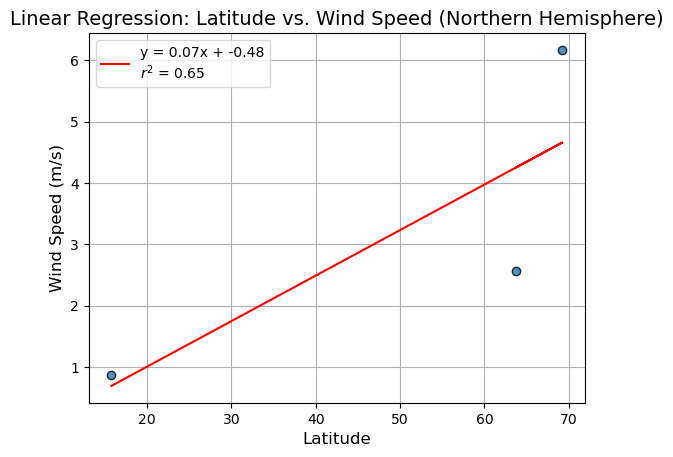

In [21]:
# Northern Hemisphere
# Perform linear regression for Latitude vs. Wind Speed in Northern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    northern_hemi_df["Lat"],               # Independent variable: Latitude
    northern_hemi_df["Wind Speed"],        # Dependent variable: Wind Speed
    "Linear Regression: Latitude vs. Wind Speed (Northern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Wind Speed (m/s)",                     # y-axis label
    "output_data/Fig_North_Lat_WindSpeed_Linear_Regression.png"  # Output file path
)





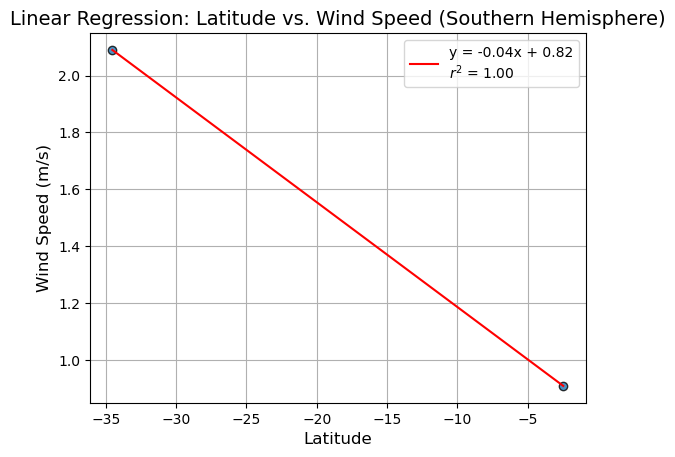

In [22]:
# Southern Hemisphere
# Perform linear regression for Latitude vs. Wind Speed in Southern Hemisphere

# Call the plot_linear_regression function with the necessary arguments
plot_linear_regression(
    southern_hemi_df["Lat"],               # Independent variable: Latitude
    southern_hemi_df["Wind Speed"],        # Dependent variable: Wind Speed
    "Linear Regression: Latitude vs. Wind Speed (Southern Hemisphere)",  # Title
    "Latitude",                             # x-axis label
    "Wind Speed (m/s)",                     # y-axis label
    "output_data/Fig_South_Lat_WindSpeed_Linear_Regression.png"  # Output file path
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE